# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 boxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [4]:
# 1.分組
app_train['CNT_CHILDREN_GROUP']="0個小孩"

In [6]:
# 1.分組
app_train.loc[(app_train['CNT_CHILDREN']>0) & (app_train['CNT_CHILDREN']<=2),'CNT_CHILDREN_GROUP']="有1-2個小孩"
app_train.loc[(app_train['CNT_CHILDREN']>2) & (app_train['CNT_CHILDREN']<=5),'CNT_CHILDREN_GROUP']="有3-5個小孩"
app_train.loc[(app_train['CNT_CHILDREN']>5),'CNT_CHILDREN_GROUP']="有超過5個小孩"

In [12]:
# 2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL
app_train.groupby('CNT_CHILDREN_GROUP')['AMT_INCOME_TOTAL'].mean()

CNT_CHILDREN_GROUP
0個小孩       166288.713566
有1-2個小孩    174725.712648
有3-5個小孩    173626.303191
有超過5個小孩    147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

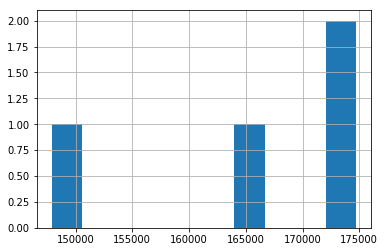

In [16]:
app_train.groupby('CNT_CHILDREN_GROUP')['AMT_INCOME_TOTAL'].mean().hist()

CNT_CHILDREN_GROUP
0個小孩       AxesSubplot(0.125,0.125;0.775x0.755)
有1-2個小孩    AxesSubplot(0.125,0.125;0.775x0.755)
有3-5個小孩    AxesSubplot(0.125,0.125;0.775x0.755)
有超過5個小孩    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

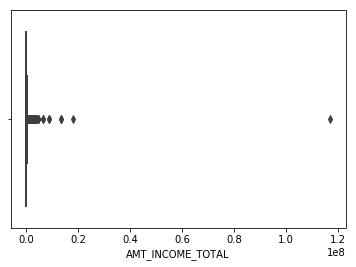

In [26]:
# 2-2 boxplot
import seaborn as sns
#def child_g_amt(x):
 #   sns.boxplot(x['AMT_INCOME_TOTAL'])
app_train.groupby("CNT_CHILDREN_GROUP").apply(lambda x :sns.boxplot(x['AMT_INCOME_TOTAL']))

In [27]:
#2-2
"""
Your code here
"""
plt_column = app_train['AMT_INCOME_TOTAL']
plt_by = app_train.groupby('CNT_CHILDREN_GROUP')

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('bbb')
plt.show()

ValueError: Grouper for '<class 'pandas.core.groupby.generic.DataFrameGroupBy'>' not 1-dimensional

In [34]:
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']=0
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CNT_CHILDREN_GROUP,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0個小孩,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0個小孩,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0個小孩,0


In [41]:
# 3.請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
import scipy.stats as st
def z_score(x):
    z=np.abs(st.zscore(x['AMT_INCOME_TOTAL']))
    print(z)
app_train.groupby('CNT_CHILDREN_GROUP').apply(z_score)


[0.34585722 0.99055573 0.9435398  ... 0.12692169 0.04499792 0.08394179]
[0.34585722 0.99055573 0.9435398  ... 0.12692169 0.04499792 0.08394179]
[0.00905643 0.15125764 0.12220624 ... 0.20595042 0.23159179 0.19501186]
[0.02325879 0.34207813 1.01956924 ... 0.05644605 0.34207813 0.82030715]
[0.867844   0.13334255 0.49239904 2.32343813 0.44621335 0.13334255
 0.44621335 0.49239904 2.32343813 0.75908415 0.49239904 0.80526984
 0.17952824 1.11814063 2.63630893 0.42982488 1.11814063 0.49239904
 0.61754736 0.49239904 0.69650999 0.17952824 1.07195494 0.13334255
 1.07195494 0.17952824 0.44621335 1.43101143 1.11814063 0.75908415
 0.49239904 0.75908415 0.13334255 0.97809371 0.61754736 1.43101143
 0.49239904 1.30586311 0.80526984 1.69769654 0.80526984 0.49239904]


""


In [39]:
app_train.groupby('CNT_CHILDREN_GROUP')['CNT_CHILDREN'].count()

CNT_CHILDREN_GROUP
0個小孩       215371
有1-2個小孩     87868
有3-5個小孩      4230
有超過5個小孩        42
Name: CNT_CHILDREN, dtype: int64

In [45]:
#3
"""
Your code here
"""
#grouped_df=app_train.groupby('CNT_CHILDREN_GROUP')
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = app_train.groupby('CNT_CHILDREN_GROUP').apply(lambda x:np.abs(st.zscore(x['AMT_INCOME_TOTAL'])))
#app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:np.abs(st.zscore(x['AMT_INCOME_TOTAL'])))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head(20)

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.000,NaN
1,270000.000,NaN
2,67500.000,NaN
3,135000.000,NaN
4,121500.000,NaN
5,99000.000,NaN
6,171000.000,NaN
7,360000.000,NaN
8,112500.000,NaN
9,135000.000,NaN
